*MINOR PROJECT*


AI project based : Digit recognizer based on ANN



In [ ]:
#gathering MNIST dataset
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#There are 60000 training sample and 10000 testing sample and with the pixel of 28*28
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
label="0 1 2 3 4 5 6 7 8 9"
label=label.split()
label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

1


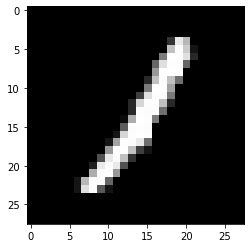

In [ ]:
import random
import matplotlib.pyplot as plt
i=random.randint(1,60000)
plt.imshow(x_train[i],cmap='gray')
op=y_train[i]
print(label[op])

In [ ]:
#normalization
x_train=x_train/255
x_test=x_test/255

In [ ]:
#Neuro Network Architecture
#classification problem:
#Hidden Layer activation function:Relu
#Output LAyer activation function:softmax
#loss function: sparse categorical entropy

In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model=keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#compiling the model
from keras.utils import to_categorical
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit the model
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(mode='min',verbose=1,patience=5)
history=model.fit(x_train,y_train,epochs=12,validation_data=(x_train,y_train),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3496 - accuracy: 0.8991 - val_loss: 0.1017 - val_accuracy: 0.9699
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9739 - val_loss: 0.0607 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0403 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0157 - val_accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.0130 - val_accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0118 - val_accuracy

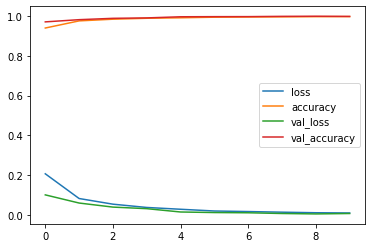

In [ ]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss.plot()

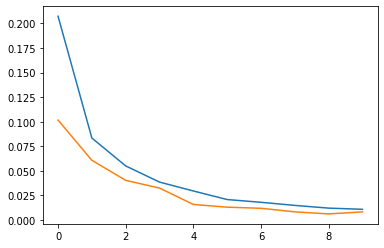

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
import numpy as np

y_predict=model.predict(x_test)
y_predict=np.argmax(y_predict,axis=1)
y_predict[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_predict,y_test)

array([[ 973,    0,    6,    0,    0,    2,    2,    2,    3,    2],
       [   1, 1126,    0,    0,    2,    0,    3,    1,    1,    2],
       [   0,    1,  995,    0,    4,    0,    0,    4,    2,    0],
       [   2,    3,    8,  993,    1,    7,    1,    0,    9,    4],
       [   0,    0,    2,    0,  957,    1,    5,    0,    2,    3],
       [   0,    0,    0,    3,    0,  873,    7,    0,    5,    2],
       [   1,    1,    2,    0,    1,    2,  940,    0,    2,    0],
       [   1,    2,   13,    4,    3,    0,    0, 1014,    3,    6],
       [   2,    2,    5,    3,    1,    2,    0,    1,  942,    0],
       [   0,    0,    1,    7,   13,    5,    0,    6,    5,  990]])

In [ ]:
accuracy_score(y_predict,y_test)

0.9803

In [ ]:
#saving the model
model.save("digit.hdf5")